In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier


import warnings
warnings.filterwarnings("ignore")

In [5]:
slf_df = pd.read_csv('./data/StressLevelDataset.csv')
slf_df

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


## KNN with K-Fold Cross Validation
- Finding the best performing random state by looping from 1 to 50
- Using 10 folds
- Looping from 1 to 21 for the number of neighbors
- Saving anything above 0.89 accuracy to evaluate

In [23]:
x = np.array(slf_df.drop(columns=['stress_level']))
y = np.array(slf_df['stress_level'])

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2, train_size=0.8)
splits = KFold(n_splits=10)

for k in range(1, 30, 2):
    scores = []
    for train_index, val_index in splits.split(X_train):
        X_sub_train = X_train[train_index]
        X_val = X_train[val_index]
        y_sub_train = y_train[train_index]
        y_val = y_train[val_index]
            
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_sub_train, y_sub_train)
        y_predict = clf.predict(X_val)
        scores.append(accuracy_score(y_val, y_predict))
    print("Neightbors: ", k, "Score: ", np.mean(scores))

Neightbors:  1 Score:  0.875
Neightbors:  3 Score:  0.875
Neightbors:  5 Score:  0.8670454545454545
Neightbors:  7 Score:  0.8681818181818184
Neightbors:  9 Score:  0.8693181818181819
Neightbors:  11 Score:  0.8727272727272727
Neightbors:  13 Score:  0.8715909090909092
Neightbors:  15 Score:  0.875
Neightbors:  17 Score:  0.8715909090909092
Neightbors:  19 Score:  0.8738636363636363
Neightbors:  21 Score:  0.8715909090909092
Neightbors:  23 Score:  0.8738636363636363
Neightbors:  25 Score:  0.8738636363636363
Neightbors:  27 Score:  0.8761363636363635
Neightbors:  29 Score:  0.875


## Confusion Matrix to visualize classification accuracy
- Using the best performing random state and number of neighbors
- Calculate the accuracy score of the training and testing data
- Plot on Confusion Matrix to visualize the predicting accuracy

0.8772727272727273


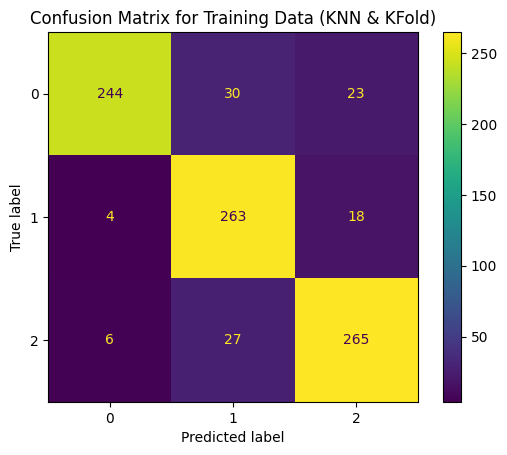

0.8909090909090909


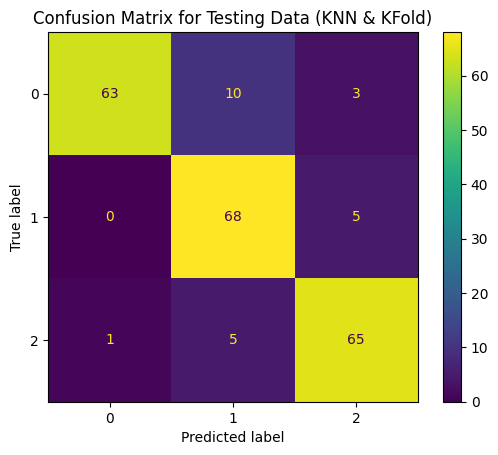

In [22]:
clf = KNeighborsClassifier(n_neighbors=27)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_train)
print(accuracy_score(y_train, y_predict))

training_cm = confusion_matrix(y_train, y_predict, labels=clf.classes_)
ConfusionMatrixDisplay(training_cm, display_labels=clf.classes_).plot()
plt.title("Confusion Matrix for Training Data (KNN & KFold)")
plt.show()

y_predict = clf.predict(X_test)
print(accuracy_score(y_test, y_predict))

testing_cm = confusion_matrix(y_test, y_predict, labels=clf.classes_)
ConfusionMatrixDisplay(testing_cm, display_labels=clf.classes_).plot()
plt.title("Confusion Matrix for Testing Data (KNN & KFold)")
plt.show()

# Multi-Layer Perceptron with KFold Cross Validation
- Try a different number of hidden layers and learning rates

{(50, 0.0001): 0.8715493023147826,
 (50, 0.001): 0.8772375844535766,
 (50, 0.01): 0.8886064095717924,
 (50, 0.1): 0.887476492303406,
 (50, 1): 0.8897518051589236,
 (100, 0.0001): 0.8738478326484177,
 (100, 0.001): 0.8772375844535767,
 (100, 0.01): 0.8863272271365884,
 (100, 0.1): 0.8863310967162746,
 (100, 1): 0.8829219970126845,
 (200, 0.0001): 0.8749816194964902,
 (200, 0.001): 0.8749545324386866,
 (200, 0.01): 0.8897401964198649,
 (200, 0.1): 0.8920193788550689,
 (200, 1): 0.8727140458003451,
 (500, 0.0001): 0.8783868496203943,
 (500, 0.001): 0.8851934402885159,
 (500, 0.01): 0.8942908221309,
 (500, 0.1): 0.8886141487311647,
 (500, 1): 0.8761154063445629}

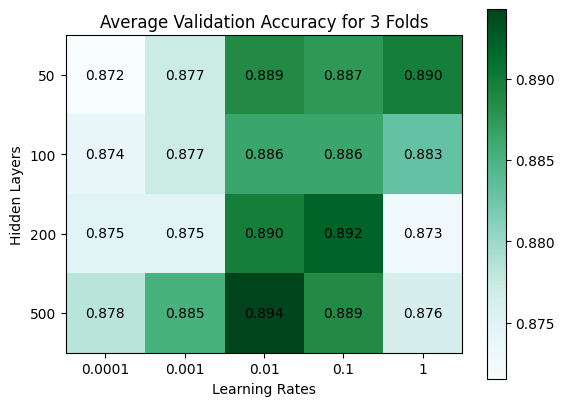

In [3]:
slf_df = pd.read_csv('./data/StressLevelDataset.csv')
x = np.array(slf_df.drop(columns=['stress_level']))
y = np.array(slf_df['stress_level'])


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

pre_processed_X_train = scaler.transform(X_train)
pre_processed_X_test = scaler.transform(X_test)

def cross_validation_mlp(pre_processed_X_train, y_train, hidden_layer_vals, learning_rate_vals):
    folds = KFold(n_splits=3)
    cross_val_scores = {}
    
    for i in hidden_layer_vals:
        for j in learning_rate_vals:
            acc_scores = []
            
            for train_index, val_index in folds.split(pre_processed_X_train):
                X_sub, X_val = pre_processed_X_train[train_index], pre_processed_X_train[val_index]
                y_sub, y_val = y_train[train_index], y_train[val_index]
                
                mlp = MLPClassifier(hidden_layer_sizes=(i), learning_rate_init=j, activation='tanh', solver='sgd', random_state=42)
                mlp.fit(X_sub, y_sub)
                y_predict = mlp.predict(X_val)
                
                acc_scores.append(accuracy_score(y_val, y_predict))
        
            cross_val_scores[i,j] = np.mean(acc_scores)
    
    return cross_val_scores

def heatmap(cross_val_scores, hidden_layer_vals, learning_rate_vals):
    cross_vals_data = list(cross_val_scores.values())
    cross_vals_data = np.array(cross_vals_data)
    cross_vals_data = cross_vals_data.reshape(len(hidden_layer_vals), len(learning_rate_vals))
    
    heatmap = plt.imshow(cross_vals_data, cmap="BuGn")
    
    plt.colorbar(heatmap)
    plt.title("Average Validation Accuracy for 3 Folds")
    plt.xlabel("Learning Rates")
    plt.ylabel("Hidden Layers")
    plt.xticks(np.arange(len(learning_rate_vals)), learning_rate_vals)
    plt.yticks(np.arange(len(hidden_layer_vals)), hidden_layer_vals)
    
    for i in range(len(hidden_layer_vals)):
        for j in range(len(learning_rate_vals)):
            plt.text(j, i, f"{cross_vals_data[i][j]:.3f}", ha='center', va='center', color='black', fontsize=10)
    
    plt.plot()
    
    return None


hidden_layer_vals = [50, 100, 200, 500]
learning_rate_vals = [0.0001, 0.001, 0.01, 0.1, 1]

cross_val_scores = cross_validation_mlp(pre_processed_X_train, y_train, hidden_layer_vals, learning_rate_vals)
display(cross_val_scores)
heatmap(cross_val_scores, hidden_layer_vals, learning_rate_vals)

In [4]:
# [500, 200, 100] gives the best structure
"""
Use K-fold cross-validation with three folds to find the best structure of the network to use, using the previously found best initial 
learning rate and different combinations of network structures.

Args:
    pre_processed_X_train: Transformed X training data.
    y_train: Y training data.
    hidden_layer_vals: Hidden layer values to be assessed.
Returns:
    cross_val_scores: Average accuracy score across all folds for each combination.
"""
def cross_validation_mlp_2(pre_processed_X_train, y_train, hidden_layer_vals):
    folds = KFold(n_splits=3)
    cross_val_scores = {}
    
    # For each hidden_layer structure & each fold, create an MLP classifier and fit the sub training data.
    # Calculate the validation accuracy for each fold then store the mean across the folds.
    for i in hidden_layer_vals:
        acc_scores = []
        for train_index, val_index in folds.split(pre_processed_X_train):
            X_sub, X_val = pre_processed_X_train[train_index], pre_processed_X_train[val_index]
            y_sub, y_val = y_train[train_index], y_train[val_index]
                
            mlp = MLPClassifier(hidden_layer_sizes=(i[:]), learning_rate_init=0.01, activation='tanh', solver='sgd', random_state=42)
            mlp.fit(X_sub, y_sub)
            y_predict = mlp.predict(X_val)
                
            acc_scores.append(accuracy_score(y_val, y_predict))
        
        cross_val_scores[str(i)] = np.mean(acc_scores)
    
    return cross_val_scores


hidden_layer_vals = [[100], [100, 100], [100, 100, 100], [200], [200, 100], [200, 100, 100], [500], [500, 200], [500, 200, 100]]
cross_val_scores = cross_validation_mlp_2(pre_processed_X_train, y_train, hidden_layer_vals)
display(cross_val_scores)

{'[100]': 0.8863272271365884,
 '[100, 100]': 0.8874571444049747,
 '[100, 100, 100]': 0.8886141487311647,
 '[200]': 0.8897401964198649,
 '[200, 100]': 0.8874803618830923,
 '[200, 100, 100]': 0.8885986704124198,
 '[500]': 0.8942908221309,
 '[500, 200]': 0.8908894615866826,
 '[500, 200, 100]': 0.8897518051589236}

Training Accuracy:  1.0
Testing Accuracy:  0.8818181818181818
[[297   0   0]
 [  0 285   0]
 [  0   0 298]]


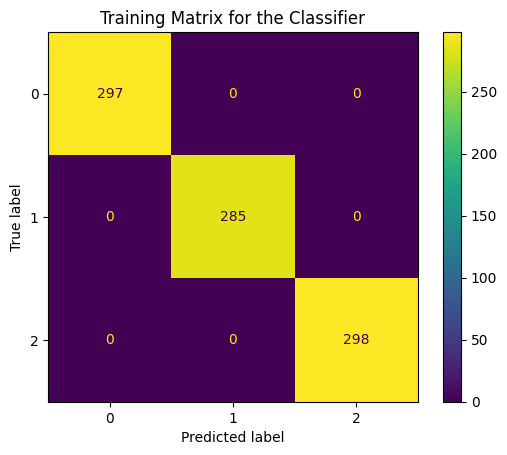

[[65  7  4]
 [ 4 66  3]
 [ 4  4 63]]


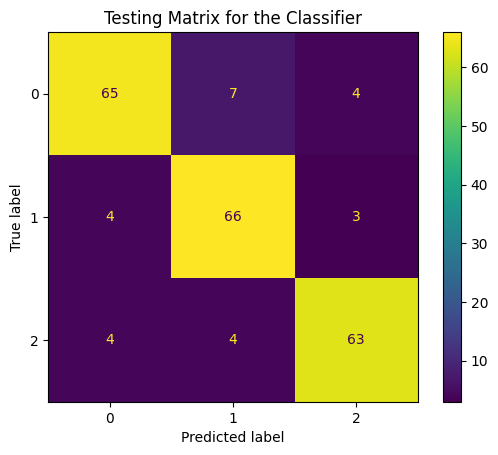

In [7]:

mlp = MLPClassifier(hidden_layer_sizes=(500), learning_rate_init=0.01, max_iter=1000, activation='tanh', solver='sgd', random_state=42)

# Fit and predict for the training and testing pre processed X data
mlp.fit(pre_processed_X_train, y_train)
y_pred_train = mlp.predict(pre_processed_X_train)
training_acc_score = accuracy_score(y_train, y_pred_train)
print("Training Accuracy: ", training_acc_score)


y_pred_test = mlp.predict(pre_processed_X_test)
testing_acc_score = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy: ", testing_acc_score)

# Create the confusion matrix / heatmap for the training data.
training_cm = confusion_matrix(y_train, y_pred_train, labels=mlp.classes_)
print(training_cm)
display_training_cm = ConfusionMatrixDisplay(confusion_matrix=training_cm, display_labels=mlp.classes_)
display_training_cm.plot()
plt.title("Training Matrix for the Classifier")
plt.show()

# Create the confusion matrix / heatmap for the testing data.
testing_cm = confusion_matrix(y_test, y_pred_test, labels=mlp.classes_)
print(testing_cm)
display_testing_cm = ConfusionMatrixDisplay(confusion_matrix=testing_cm, display_labels=mlp.classes_)
display_testing_cm.plot()
plt.title("Testing Matrix for the Classifier")
plt.show()

# SVC Attempt


In [36]:
slf_df = pd.read_csv('./data/StressLevelDataset.csv')
x = np.array(slf_df.drop(columns=['stress_level']))
y = np.array(slf_df['stress_level'])


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

svm_classifier = SVC(kernel='rbf', C=1000, gamma='scale', random_state=42)
svm_classifier.fit(X_train, y_train)

y_predict_train = svm_classifier.predict(X_train)
y_predict_test = svm_classifier.predict(X_test)

print("Training: ", accuracy_score(y_train, y_predict_train))
print("Testing: ", accuracy_score(y_test, y_predict_test))


Training:  1.0
Testing:  0.8818181818181818


In [39]:
from sklearn.model_selection import GridSearchCV 
  
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'scale'], 
              'kernel': ['rbf', 'poly', '', 'linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train)

# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 


Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.335 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.335 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.341 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.619 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.432 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.898 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.892 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.915 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.858 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.858 total time=   0.0s
[CV 1/5] END .............C=0.1, gamma=1, kernel=;, score=nan total time=   0.0s
[CV 2/5] END .............C=0.1, gamma=1, kern

In [41]:
svm_classifier = SVC(kernel='linear', C=100, gamma=1, random_state=42)
svm_classifier.fit(X_train, y_train)

y_predict_train = svm_classifier.predict(X_train)
y_predict_test = svm_classifier.predict(X_test)

print("Training: ", accuracy_score(y_train, y_predict_train))
print("Testing: ", accuracy_score(y_test, y_predict_test))

Training:  0.9159090909090909
Testing:  0.8863636363636364
